##Time Series Forecasting Of Shampoo Sales Using Mchine Learning Library Called ARIMA



What is a model of a AR?

What is an Autoregressive Model? An autoregressive (AR) model predicts future behavior based on past behavior. It's used for forecasting when there is some correlation between values in a time series and the values that precede and succeed them

What is Ma process in time series?

In time series analysis, the moving-average model (MA model), also known as moving-average process, is a common approach for modeling univariate time series.

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import datetime

In [82]:
df = pd.read_csv('D:/Test/Shampoo.csv')
df

,Month,Sales of shampoo over a three year period
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3
5,1-06,168.5
6,1-07,231.8
7,1-08,224.5
8,1-09,192.8
9,1-10,122.9


In [83]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
df = pd.read_csv('D:/Test/Shampoo.csv', header=0,parse_dates=True,index_col='Month')

In [84]:
df.head()

,Sales of shampoo over a three year period
Month,
1-01,266.0
1-02,145.9
1-03,183.1
1-04,119.3
1-05,180.3


In [85]:
df=df.dropna()

In [86]:
df.shape

(36, 1)

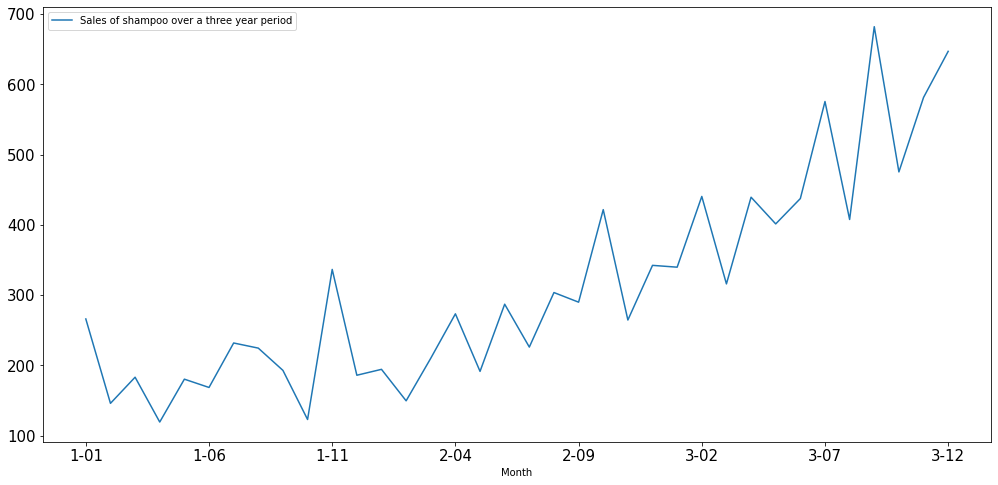

In [87]:

df.plot()
plt.show()

In [88]:
X=df.values


In [89]:
X

array([[266. ],
       [145.9],
       [183.1],
       [119.3],
       [180.3],
       [168.5],
       [231.8],
       [224.5],
       [192.8],
       [122.9],
       [336.5],
       [185.9],
       [194.3],
       [149.5],
       [210.1],
       [273.3],
       [191.4],
       [287. ],
       [226. ],
       [303.6],
       [289.9],
       [421.6],
       [264.5],
       [342.3],
       [339.7],
       [440.4],
       [315.9],
       [439.3],
       [401.3],
       [437.4],
       [575.5],
       [407.6],
       [682. ],
       [475.3],
       [581.3],
       [646.9]])

In [16]:
size = int(len(X) * 0.70)
print(len(X))
print(size)

36
25


In [17]:
train, test = X[0:size], X[size:len(X)]

In [18]:
train

array([[266. ],
       [145.9],
       [183.1],
       [119.3],
       [180.3],
       [168.5],
       [231.8],
       [224.5],
       [192.8],
       [122.9],
       [336.5],
       [185.9],
       [194.3],
       [149.5],
       [210.1],
       [273.3],
       [191.4],
       [287. ],
       [226. ],
       [303.6],
       [289.9],
       [421.6],
       [264.5],
       [342.3],
       [339.7]])

In [19]:
test

array([[440.4],
       [315.9],
       [439.3],
       [401.3],
       [437.4],
       [575.5],
       [407.6],
       [682. ],
       [475.3],
       [581.3],
       [646.9]])

In [20]:
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history,order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print(f'Predicted={yhat},Expected ={obs}')
error = mean_squared_error(test,predictions)
print(f"TEST MSE :{error}")

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Predicted=[387.37635503],Expected =[440.4]
Predicted=[348.15422407],Expected =[315.9]
Predicted=[386.30873564],Expected =[439.3]
Predicted=[356.08213522],Expected =[401.3]
Predicted=[446.37949922],Expected =[437.4]
Predicted=[394.73731958],Expected =[575.5]
Predicted=[434.9155186],Expected =[407.6]
Predicted=[507.92333692],Expected =[682.]
Predicted=[435.48297593],Expected =[475.3]
Predicted=[652.74379393],Expected =[581.3]
Predicted=[546.34341033],Expected =[646.9]
TEST MSE :8119.128212443171


In [21]:
history

[array([266.]),
 array([145.9]),
 array([183.1]),
 array([119.3]),
 array([180.3]),
 array([168.5]),
 array([231.8]),
 array([224.5]),
 array([192.8]),
 array([122.9]),
 array([336.5]),
 array([185.9]),
 array([194.3]),
 array([149.5]),
 array([210.1]),
 array([273.3]),
 array([191.4]),
 array([287.]),
 array([226.]),
 array([303.6]),
 array([289.9]),
 array([421.6]),
 array([264.5]),
 array([342.3]),
 array([339.7]),
 array([440.4]),
 array([315.9]),
 array([439.3]),
 array([401.3]),
 array([437.4]),
 array([575.5]),
 array([407.6]),
 array([682.]),
 array([475.3]),
 array([581.3]),
 array([646.9])]

In [22]:
output

(array([546.34341033]),
 array([63.45598462]),
 array([[421.97196588, 670.71485478]]))

In [23]:
output[0]

array([546.34341033])

In [24]:
obs

array([646.9])

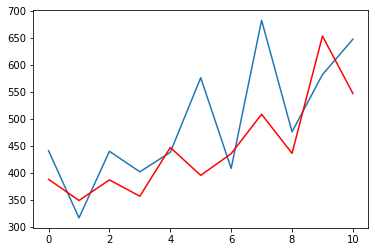

In [25]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

# Method -2

In [54]:
##Import the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pylab import rcParams

In [58]:
# #Creating pandas df
df = pd.read_csv('D:/Test/Shampoo1.csv')

In [59]:
df.shape

(36, 2)

In [60]:

df.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [61]:

df.tail()

,Month,Sales
31,3-08,407.6
32,3-09,682.0
33,3-10,475.3
34,3-11,581.3
35,3-12,646.9


In [62]:
date = pd.date_range(start='1/1/2001', end='12/31/2003', freq='M')
date

DatetimeIndex(['2001-01-31', '2001-02-28', '2001-03-31', '2001-04-30',
               '2001-05-31', '2001-06-30', '2001-07-31', '2001-08-31',
               '2001-09-30', '2001-10-31', '2001-11-30', '2001-12-31',
               '2002-01-31', '2002-02-28', '2002-03-31', '2002-04-30',
               '2002-05-31', '2002-06-30', '2002-07-31', '2002-08-31',
               '2002-09-30', '2002-10-31', '2002-11-30', '2002-12-31',
               '2003-01-31', '2003-02-28', '2003-03-31', '2003-04-30',
               '2003-05-31', '2003-06-30', '2003-07-31', '2003-08-31',
               '2003-09-30', '2003-10-31', '2003-11-30', '2003-12-31'],
              dtype='datetime64[ns]', freq='M')

In [63]:
df['Time_Stamp'] = pd.DataFrame(date,columns=['Date'])
df.head()
df.tail()

,Month,Sales,Time_Stamp
31,3-08,407.6,2003-08-31
32,3-09,682.0,2003-09-30
33,3-10,475.3,2003-10-31
34,3-11,581.3,2003-11-30
35,3-12,646.9,2003-12-31


In [64]:
df = df.set_index('Time_Stamp')
df.head()

,Month,Sales
Time_Stamp,,
2001-01-31,1-01,266.0
2001-02-28,1-02,145.9
2001-03-31,1-03,183.1
2001-04-30,1-04,119.3
2001-05-31,1-05,180.3


In [65]:
df_final = df.drop(['Month'], axis=1)
df_final.head()

,Sales
Time_Stamp,
2001-01-31,266.0
2001-02-28,145.9
2001-03-31,183.1
2001-04-30,119.3
2001-05-31,180.3


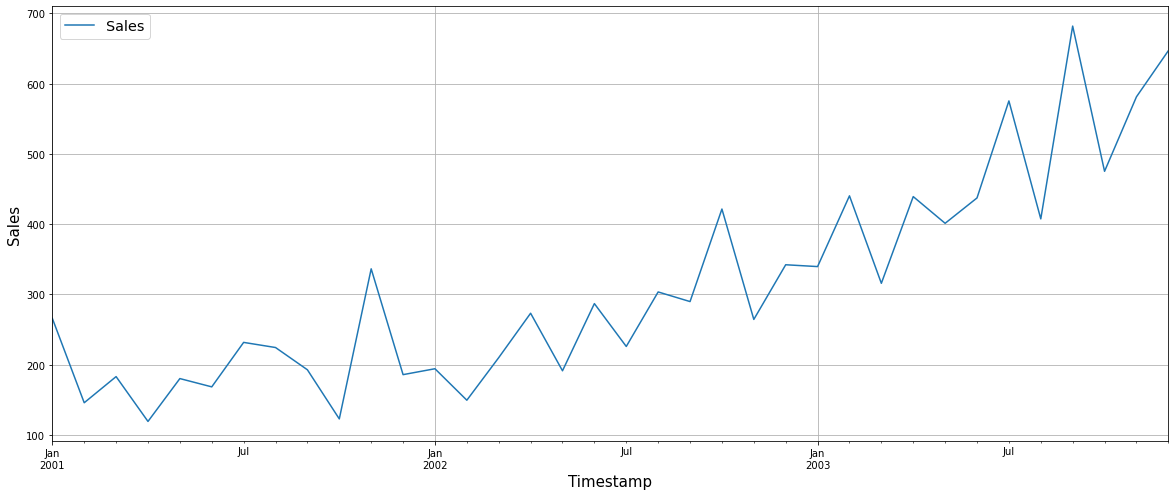

In [66]:
#Plotting the time-series
df_final.plot(figsize=(20,8))
plt.grid();
plt.xlabel('Timestamp',fontsize=15)
plt.ylabel('Sales',fontsize=15)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.legend(fontsize="x-large")

In [67]:
df_final.isnull().sum()

Sales    0
dtype: int64

In [68]:
round(df_final.describe(),3)

,Sales
count,36.000
mean,312.600
std,148.937
min,119.300
25%,192.450
50%,280.150
75%,411.100
max,682.000


No handles with labels found to put in legend.


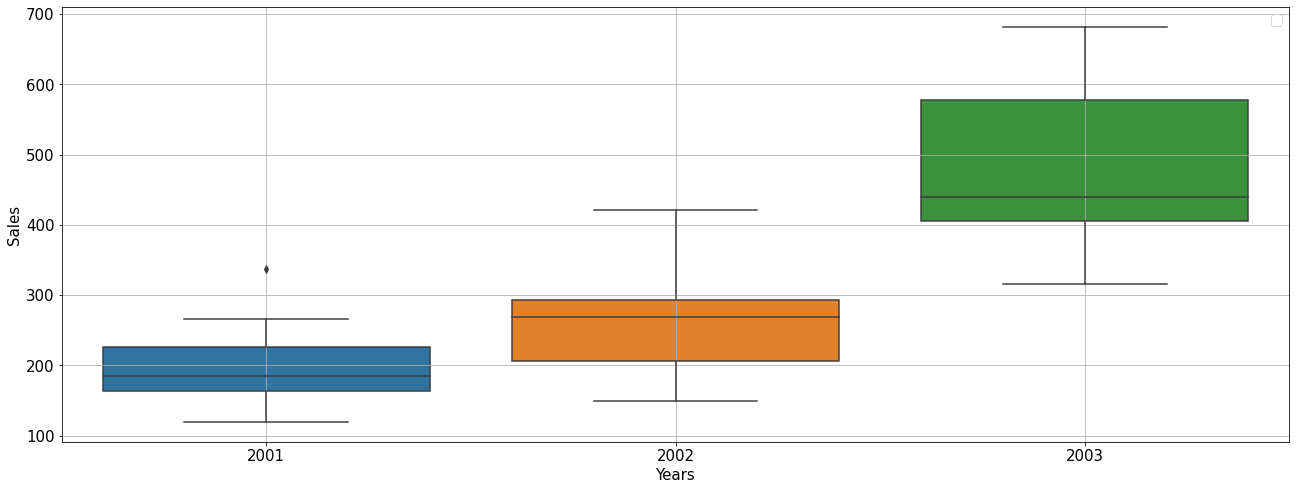

In [69]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df_final.index.year,y = df_final.values[:,0],ax=ax)
plt.grid();
plt.xlabel('Years',fontsize=15)
plt.ylabel('Sales',fontsize=15)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.legend(fontsize="x-large")

No handles with labels found to put in legend.


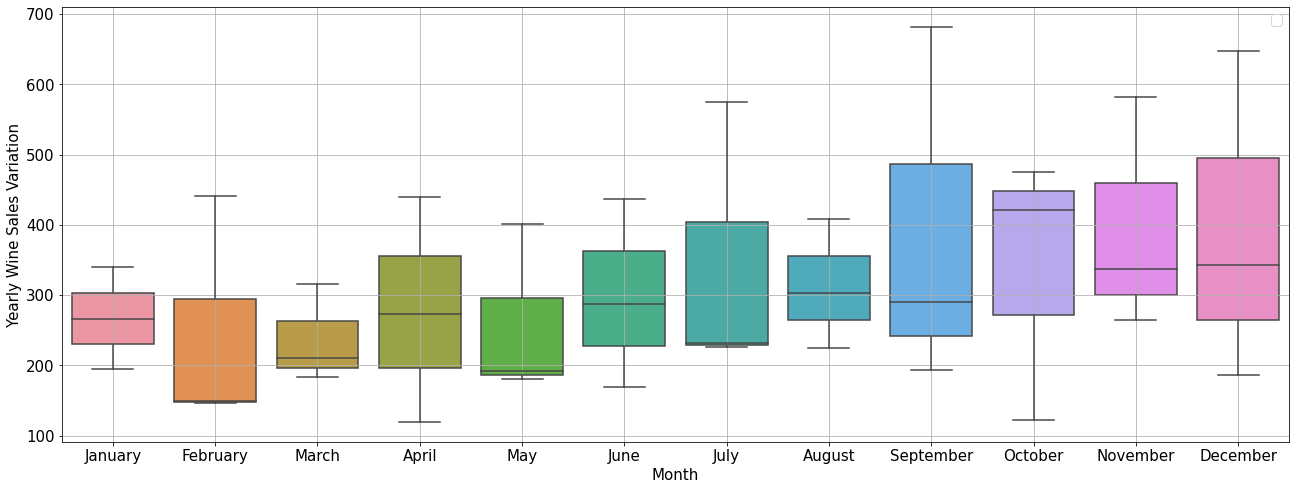

In [70]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df_final.index.month_name(),y = df_final.values[:,0],ax=ax)

plt.grid();
plt.xlabel('Month',fontsize=15)
plt.ylabel('Yearly Wine Sales Variation',fontsize=15)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.legend(fontsize="x-large")

In [71]:
monthly_sales_across_years = pd.pivot_table(df_final, values = 'Sales', columns = df_final.index.month_name(), index = df_final.index.year)
monthly_sales_across_years

Time_Stamp,April,August,December,February,January,July,June,March,May,November,October,September
Time_Stamp,,,,,,,,,,,,
2001,119.3,224.5,185.9,145.9,266.0,231.8,168.5,183.1,180.3,336.5,122.9,192.8
2002,273.3,303.6,342.3,149.5,194.3,226.0,287.0,210.1,191.4,264.5,421.6,289.9
2003,439.3,407.6,646.9,440.4,339.7,575.5,437.4,315.9,401.3,581.3,475.3,682.0


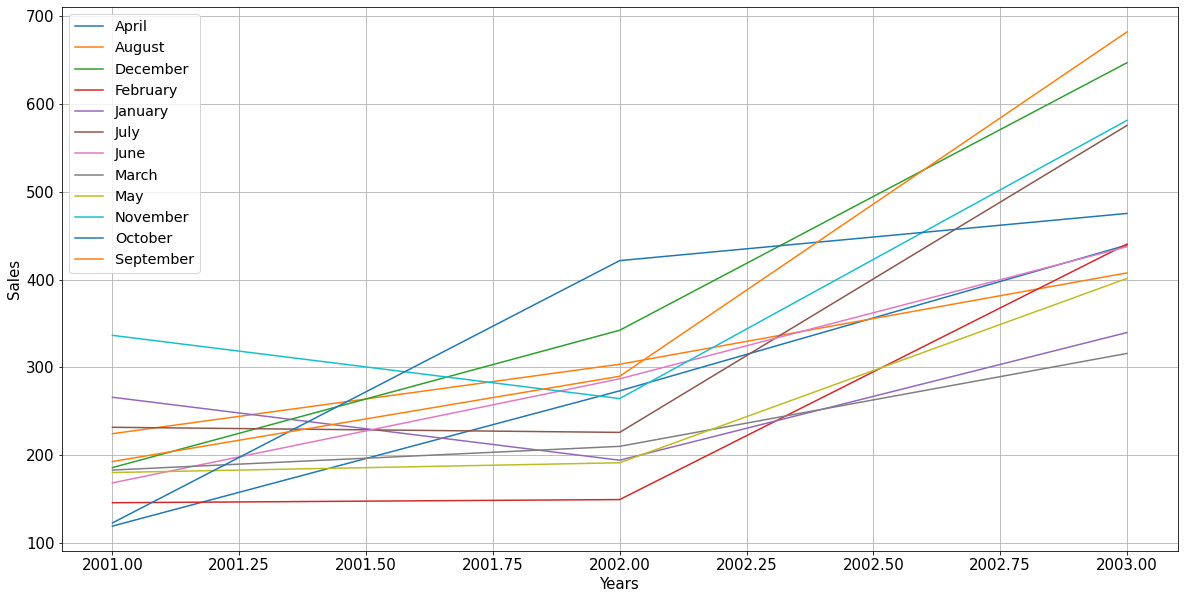

In [72]:
monthly_sales_across_years.plot(figsize=(20,10))
plt.grid()
plt.legend(loc='best');
plt.xlabel('Years',fontsize=15)
plt.ylabel('Sales',fontsize=15)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.legend(fontsize="x-large")

In [73]:
quarterly_turnover = pd.pivot_table(df_final, values = "Sales", columns = df_final.index.quarter, index = df_final.index.year)
quarterly_turnover

Time_Stamp,1,2,3,4
Time_Stamp,,,,
2001,198.333333,156.033333,216.366667,215.100000
2002,184.633333,250.566667,273.166667,342.800000
2003,365.333333,426.000000,555.033333,567.833333


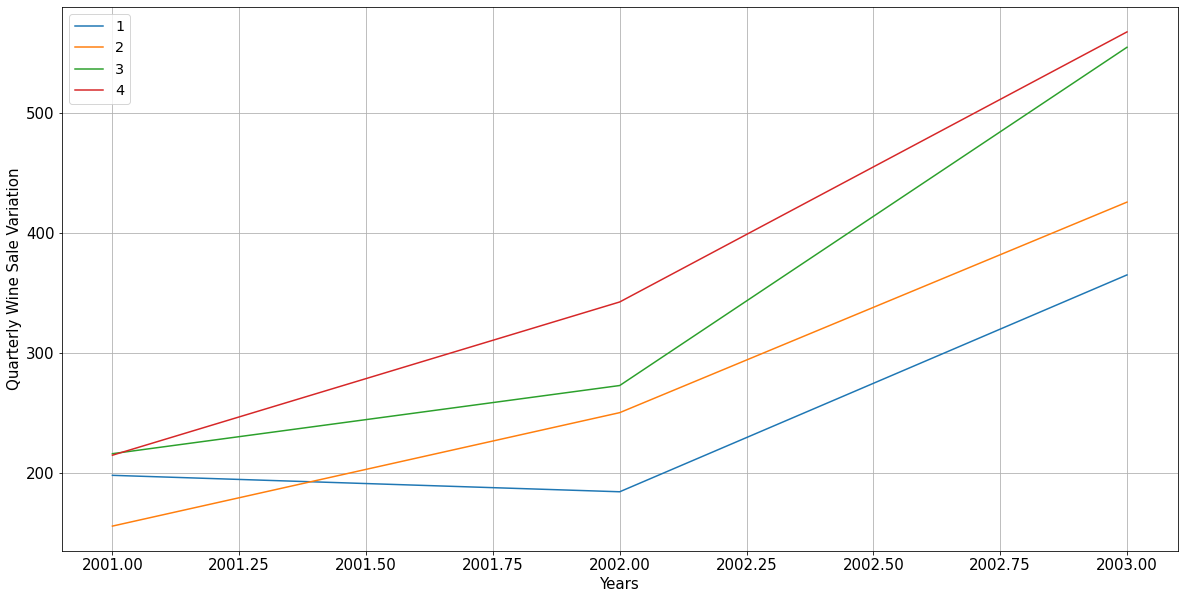

In [74]:
quarterly_turnover.plot(figsize=(20,10))
plt.grid()
plt.legend(loc='best');

plt.xlabel('Years',fontsize=15)
plt.ylabel('Quarterly Wine Sale Variation',fontsize=15)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.legend(fontsize="x-large")

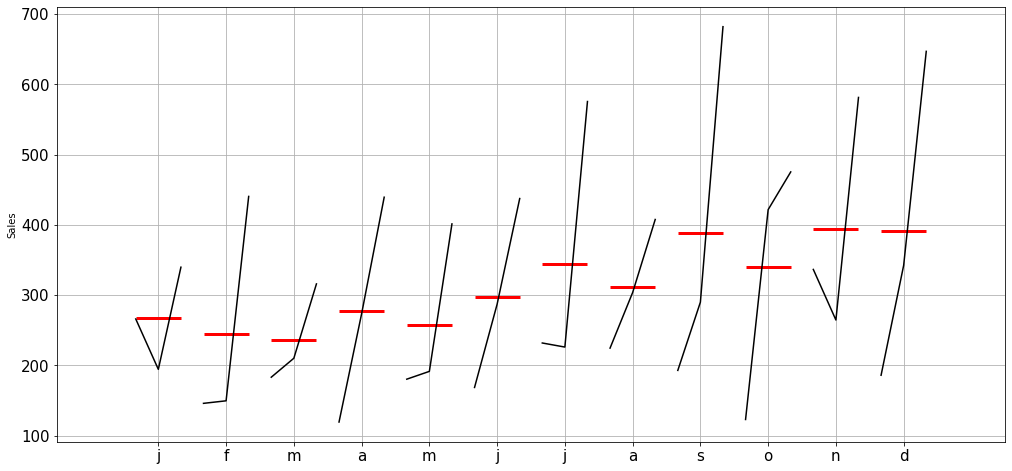

In [75]:
from pylab import rcParams

rcParams['figure.figsize'] =17,8

from statsmodels.graphics.tsaplots import month_plot
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
month_plot(df_final['Sales'],ylabel='Sales')
plt.grid();

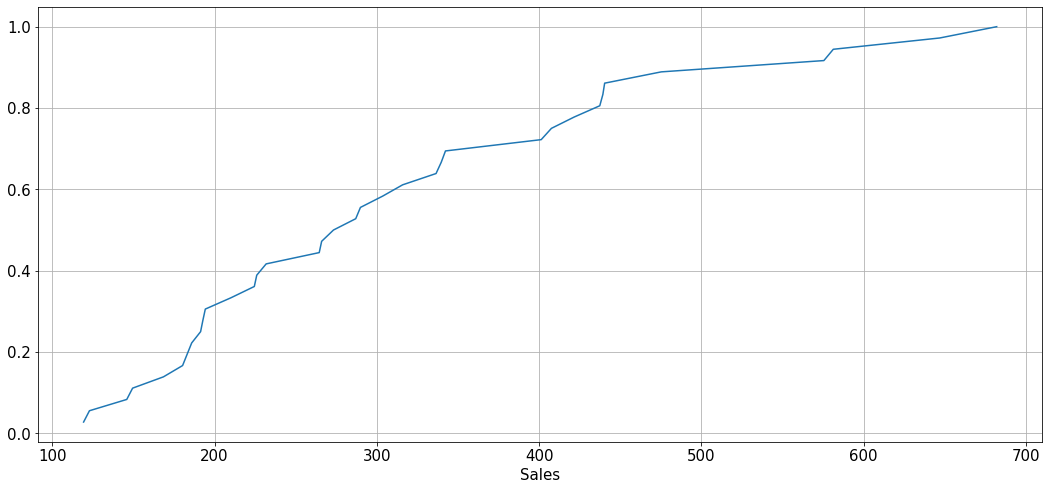

In [76]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(df_final['Sales'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.xlabel('Sales', fontsize = 15);

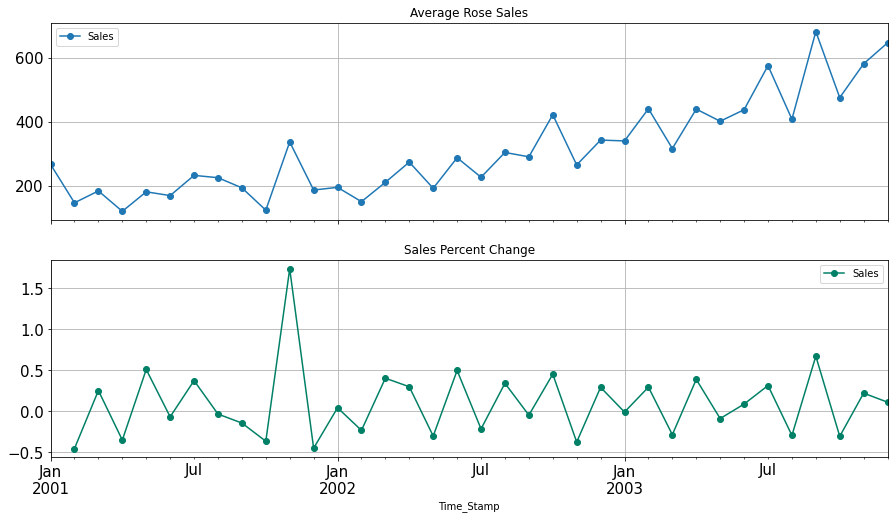

In [77]:
# group by date and get average Customers, and precent change
average    = df_final.groupby(df_final.index)["Sales"].mean()
pct_change = df_final.groupby(df_final.index)["Sales"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average Customers over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Rose Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for Customers over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Sales Percent Change",grid=True)

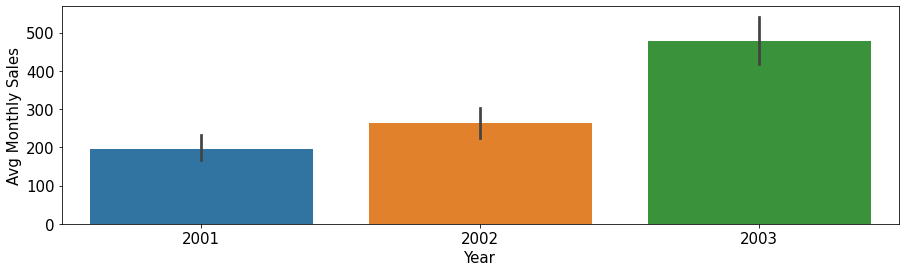

In [78]:
## Plot sales for every year
fig, (axis1) = plt.subplots(1,figsize=(15,4))

sns.barplot(x=df_final.index.year, y=df_final.values[:,0], data=df_final, ax=axis1);
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.xlabel('Year', fontsize = 15);
plt.ylabel('Avg Monthly Sales', fontsize = 15);

In [79]:
monthly_sales_across_years = pd.pivot_table(df_final, values = 'Sales', columns = df_final.index.month_name(), index = df_final.index.year)
yearly_total_sales = monthly_sales_across_years.sum(axis = 1, skipna = True) 
yearly_total_sales

Time_Stamp
2001    2357.5
2002    3153.5
2003    5742.6
dtype: float64

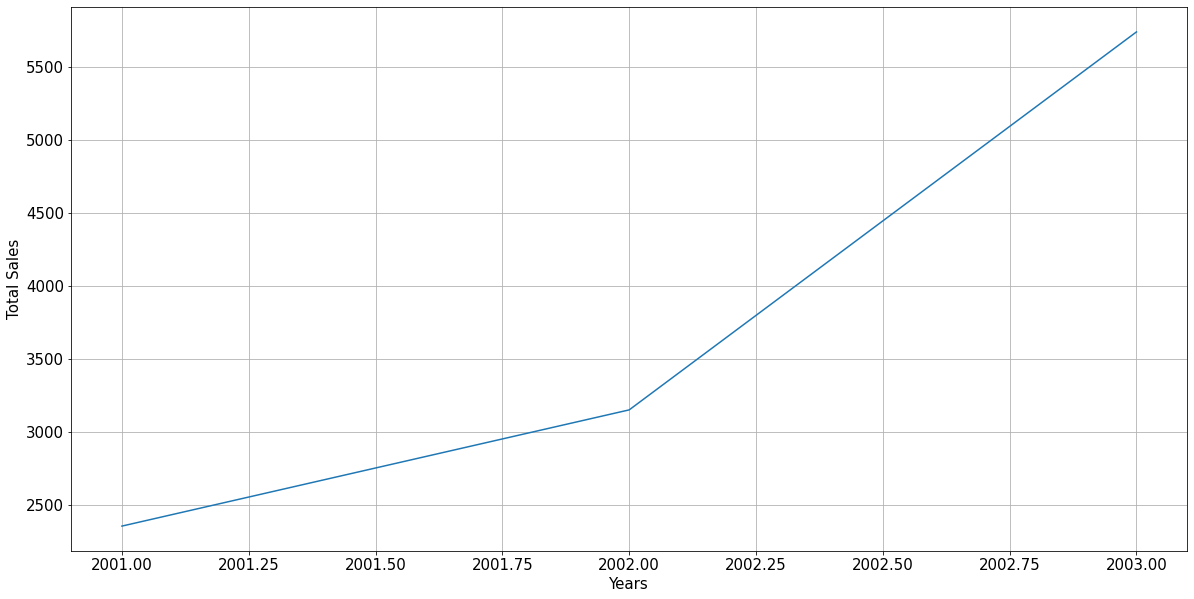

In [80]:
yearly_total_sales.plot(figsize=(20,10))
plt.grid()

plt.xlabel('Years',fontsize=15)
plt.ylabel('Total Sales',fontsize=15)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)